# Exploratory Data Analysis - House Prices

## Importing libraries

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

## Defining functions

In [2]:
def plot_multiple_charts(dataframe):
    cols = dataframe.columns
    number_of_cols = len(cols)
    ax_n_cols = 4
    ax_n_rows = number_of_cols / 4 if number_of_cols % 4 == 0 \
        else int(number_of_cols / ax_n_cols) + 1
    fig, axs = plt.subplots(nrows=ax_n_rows, ncols=4, figsize=(20, 40),
                            layout='constrained');

    i = 0
    for row in range(ax_n_rows):
        for col in range(ax_n_cols):
            ax = axs[row, col]
            if i < number_of_cols:
                sns.countplot(dataframe, ax=ax, x=cols[i]);
                ax.set_title(cols[i])
            else:
                ax.set_axis_off()
            i = i +1

## Loading data

In [21]:
if 'KAGGLE_KERNEL_RUN_TYPE' in os.environ:
    # Kaggle-specific configuration
    TEST_PATH = Path('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
    TRAIN_PATH = Path('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
else:
    # Local configuration
    TEST_PATH = Path('data/test.csv')
    TRAIN_PATH = Path('data/train.csv')

houses_test = pd.read_csv(TEST_PATH)
houses_train = pd.read_csv(TRAIN_PATH)

In [22]:
print('Full train dataset shape is {} rows and {} columns.'.format(houses_train.shape[0], houses_train.shape[1]))
print('Full test dataset shape is {} rows and {} columns.'.format(houses_test.shape[0], houses_test.shape[1]))

Full train dataset shape is 1460 rows and 81 columns.
Full test dataset shape is 1459 rows and 80 columns.


In [23]:
houses_train.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [24]:
houses_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [25]:
houses_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

`Id` columns is not important for the analysis neither for the model, so it will be dropped from both datasets.

In [26]:
houses_train = houses_train.drop(columns=['Id'])
houses_test = houses_test.drop(columns=['Id'])

## Target: Sales Price

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64



<Figure size 1000x700 with 0 Axes>

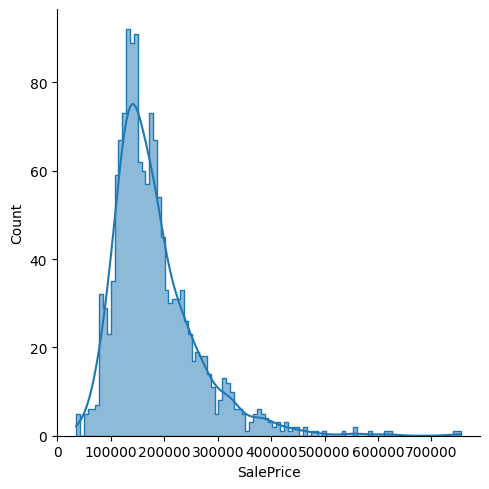

In [27]:
print(houses_train['SalePrice'].describe(), end='\n\n')
plt.figure(figsize=(10,7));
sns.displot(houses_train['SalePrice'], bins=100, kde=True, element='step');

## Predictors: comparing distributions from train and test dataframes

### Numerical features

In [41]:
numerical_features = houses_test.select_dtypes(exclude=['object']).columns

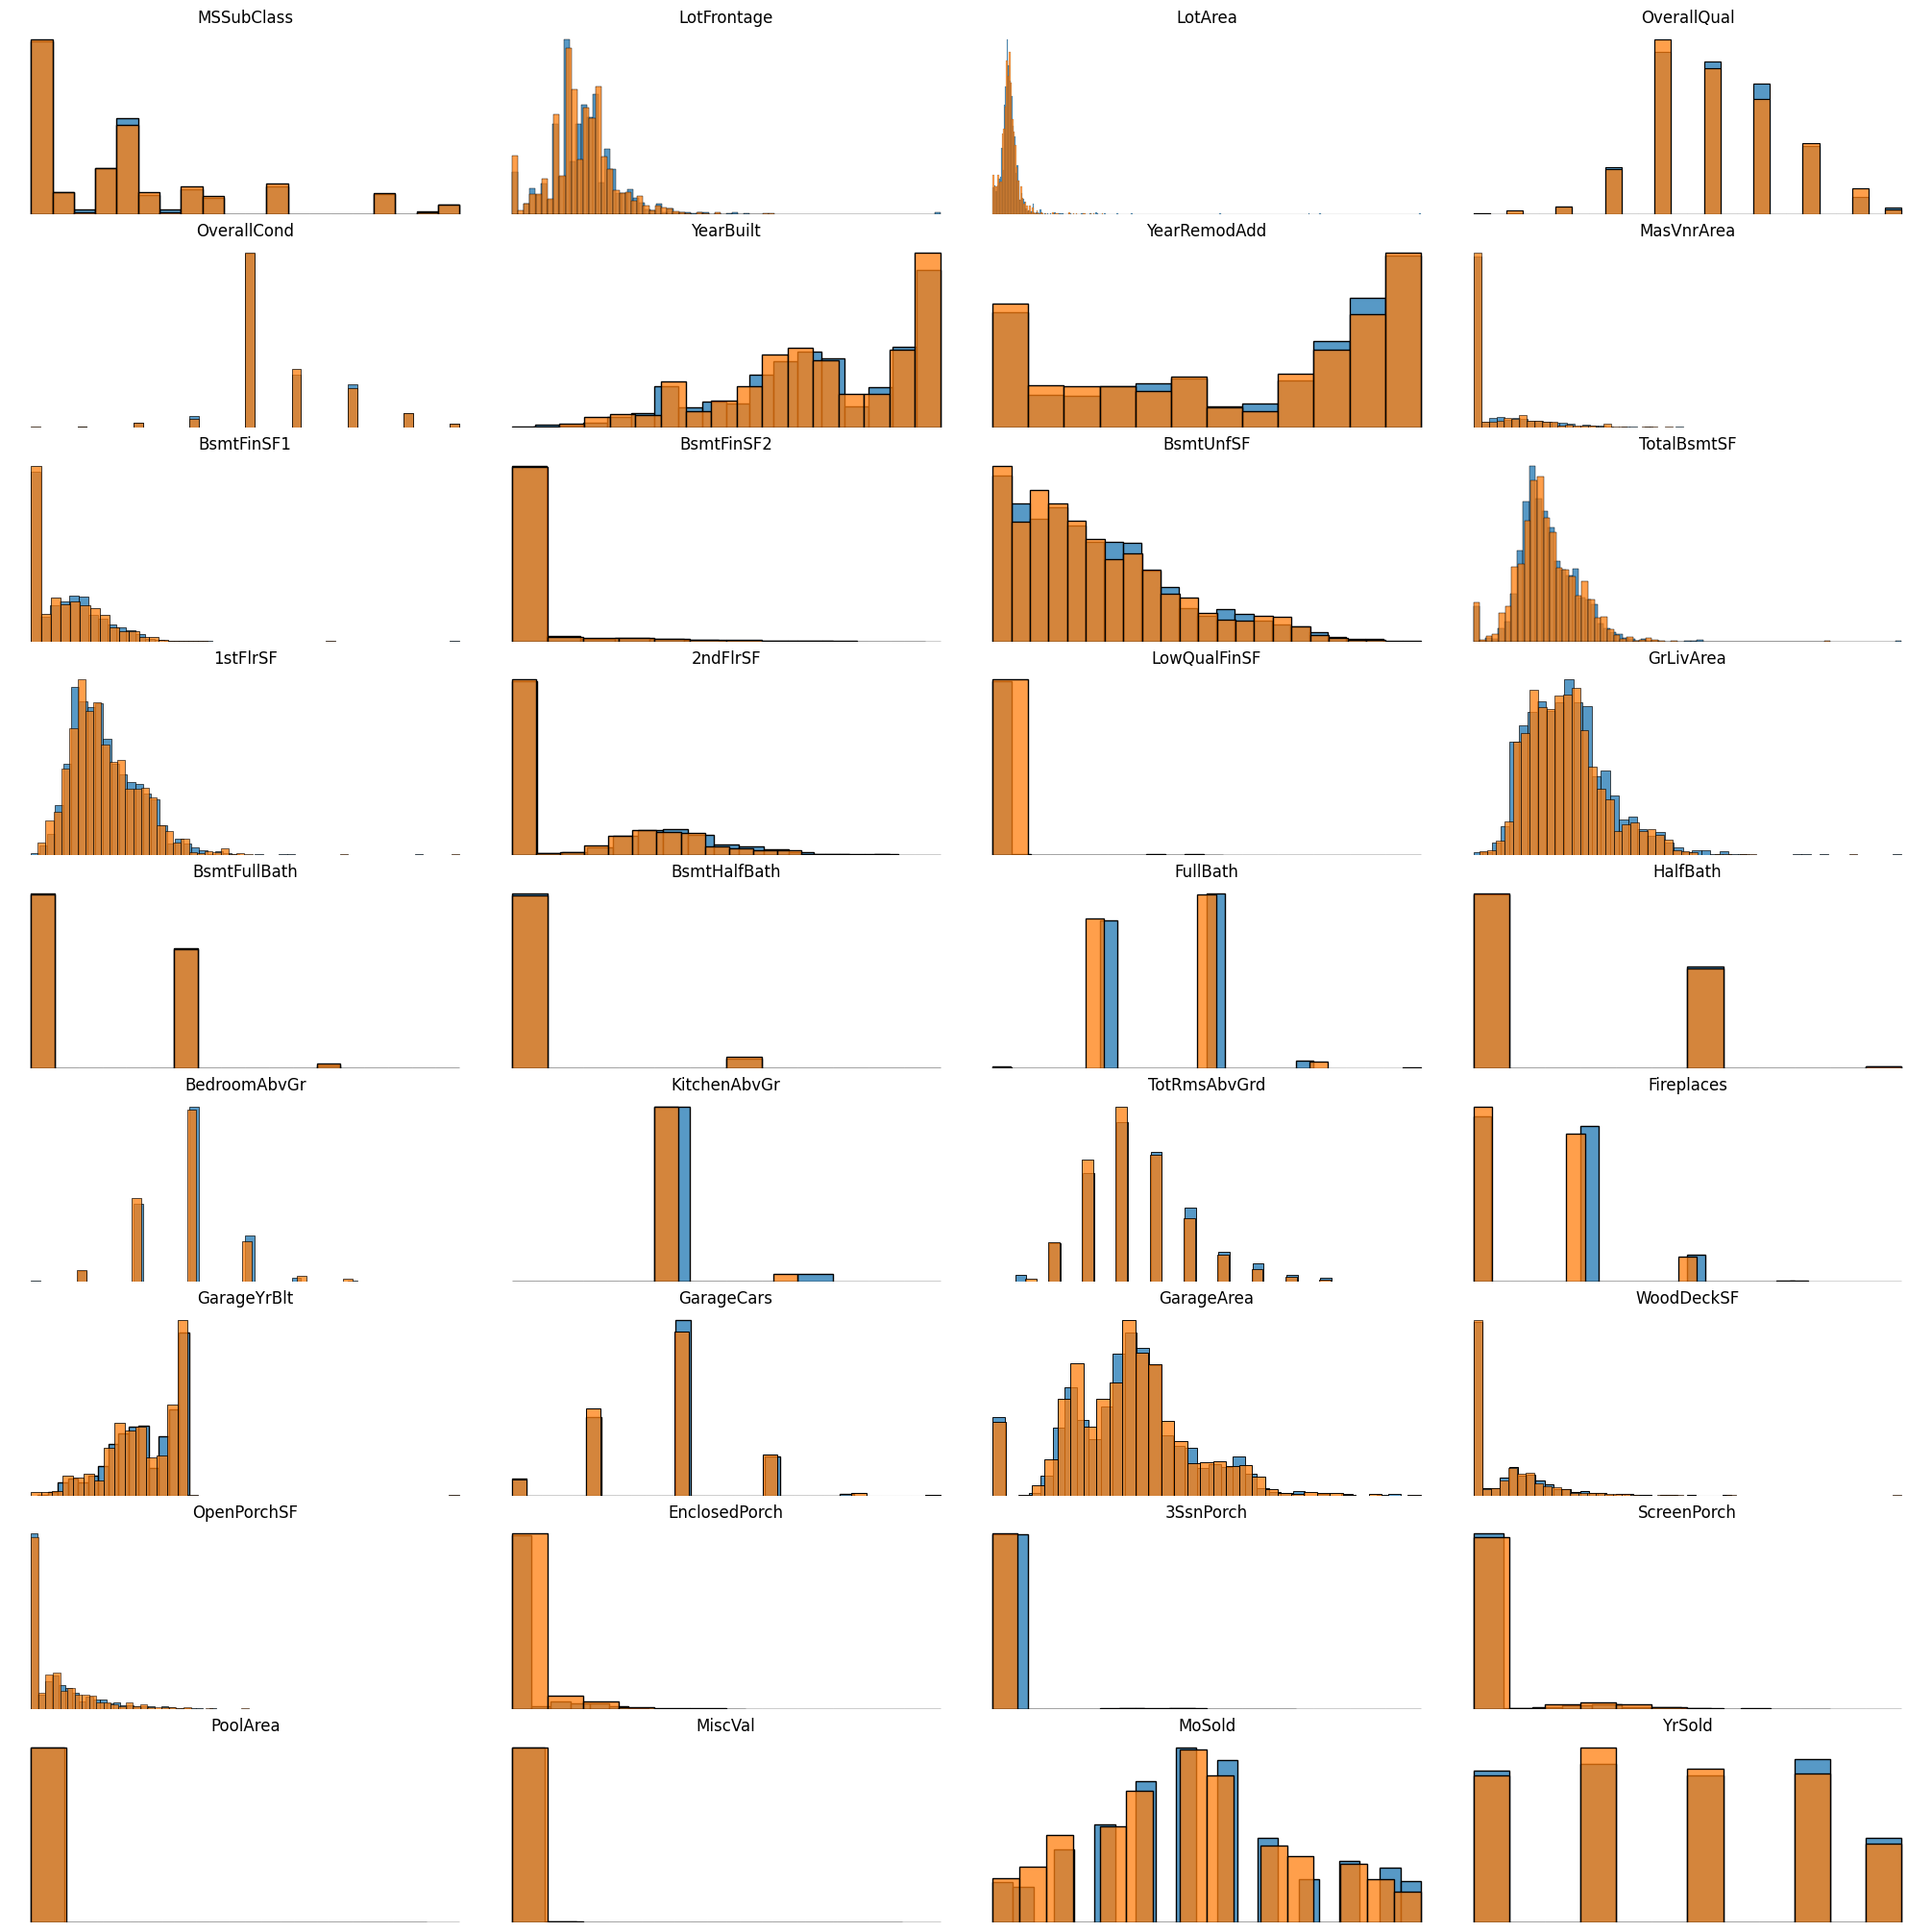

In [53]:
ncols =  4
nrows = int(len(numerical_features) / ncols) if len(numerical_features) % ncols == 0 else int(len(numerical_features) / ncols) + 1

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20,20), layout='constrained')
i=0
for row in range(nrows):
    for col in range(ncols):
        if i < len(numerical_features):
            sns.histplot(data=houses_train[numerical_features[i]], ax=axs[row, col])
            sns.histplot(data=houses_test[numerical_features[i]], ax=axs[row, col])
            axs[row, col].set_title(numerical_features[i])
        i = i +1
        axs[row, col].set_axis_off()